In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('globalAirQuality.csv')
df.head()

,timestamp,country,city,latitude,longitude,pm25,pm10,no2,so2,o3,co,aqi,temperature,humidity,wind_speed
0,2025-11-04 18:25:17.554219,US,New York,40.713,-74.006,50.295,108.938,27.998,6.539,52.568,1.096,108,18.504,70.168,3.725
1,2025-11-04 19:25:17.554219,US,New York,40.713,-74.006,32.083,63.043,36.120,4.021,43.536,1.075,90,5.838,80.088,8.969
2,2025-11-04 20:25:17.554219,US,New York,40.713,-74.006,42.250,82.553,26.935,9.538,23.320,0.977,84,31.833,62.783,9.650
3,2025-11-04 21:25:17.554219,US,New York,40.713,-74.006,30.403,79.951,63.536,7.609,31.369,0.230,158,23.140,89.153,8.956
4,2025-11-04 22:25:17.554219,US,New York,40.713,-74.006,21.083,66.423,38.997,6.919,45.615,1.085,97,13.632,76.499,4.017


In [3]:
df.describe()

,latitude,longitude,pm25,pm10,no2,so2,o3,co,aqi,temperature,humidity,wind_speed
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,23.065980,37.655560,40.369131,70.152228,32.055176,6.035508,48.065100,0.800595,104.645556,21.510251,57.714351,5.283910
std,26.156536,78.600701,17.647450,24.999440,13.820680,2.454790,14.950849,0.250254,25.616070,9.509444,18.844908,2.741712
min,-37.814000,-123.121000,0.025000,0.061000,0.013000,0.003000,0.114000,0.000000,16.000000,5.000000,25.002000,0.500000
25%,12.972000,2.352000,27.904500,53.125500,22.362500,4.360750,38.028500,0.633000,87.000000,13.357750,41.320000,2.937000
50%,29.232000,42.146000,40.286500,69.961000,32.019500,6.026000,48.142000,0.800500,103.000000,21.455500,57.847000,5.297000
75%,41.008000,103.820000,52.436250,87.256500,41.364250,7.715250,58.258500,0.969000,121.000000,29.688250,74.234750,7.662000
max,60.170000,174.763000,115.683000,161.810000,90.019000,16.559000,103.016000,1.832000,231.000000,37.998000,89.997000,9.999000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    18000 non-null  object 
 1   country      18000 non-null  object 
 2   city         18000 non-null  object 
 3   latitude     18000 non-null  float64
 4   longitude    18000 non-null  float64
 5   pm25         18000 non-null  float64
 6   pm10         18000 non-null  float64
 7   no2          18000 non-null  float64
 8   so2          18000 non-null  float64
 9   o3           18000 non-null  float64
 10  co           18000 non-null  float64
 11  aqi          18000 non-null  int64  
 12  temperature  18000 non-null  float64
 13  humidity     18000 non-null  float64
 14  wind_speed   18000 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 2.1+ MB


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day_name'] = df['timestamp'].dt.day_name()

In [6]:
df

,timestamp,country,city,latitude,longitude,pm25,pm10,no2,so2,o3,co,aqi,temperature,humidity,wind_speed,hour,day_name
0,2025-11-04 18:25:17.554219,US,New York,40.713,-74.006,50.295,108.938,27.998,6.539,52.568,1.096,108,18.504,70.168,3.725,18,Tuesday
1,2025-11-04 19:25:17.554219,US,New York,40.713,-74.006,32.083,63.043,36.120,4.021,43.536,1.075,90,5.838,80.088,8.969,19,Tuesday
2,2025-11-04 20:25:17.554219,US,New York,40.713,-74.006,42.250,82.553,26.935,9.538,23.320,0.977,84,31.833,62.783,9.650,20,Tuesday
3,2025-11-04 21:25:17.554219,US,New York,40.713,-74.006,30.403,79.951,63.536,7.609,31.369,0.230,158,23.140,89.153,8.956,21,Tuesday
4,2025-11-04 22:25:17.554219,US,New York,40.713,-74.006,21.083,66.423,38.997,6.919,45.615,1.085,97,13.632,76.499,4.017,22,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,2025-11-19 13:25:17.554219,CH,Zurich,47.377,8.542,27.899,74.179,41.474,6.677,50.869,1.028,103,7.079,52.443,7.452,13,Wednesday
17996,2025-11-19 14:25:17.554219,CH,Zurich,47.377,8.542,2.950,47.988,42.235,2.821,35.551,0.644,105,28.734,85.678,4.496,14,Wednesday
17997,2025-11-19 15:25:17.554219,CH,Zurich,47.377,8.542,61.347,72.908,46.976,5.763,66.492,0.947,122,21.951,72.311,9.660,15,Wednesday
17998,2025-11-19 16:25:17.554219,CH,Zurich,47.377,8.542,40.722,95.152,32.957,5.524,53.193,0.868,95,24.042,31.880,2.642,16,Wednesday


In [7]:
# define a func to categorize AQI
def get_aqi_category(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# apply the function
df['aqi_category'] = df['aqi'].apply(get_aqi_category)

print(df['aqi_category'].value_counts())

aqi_category
Unhealthy for Sensitive Groups    8874
Moderate                          8108
Unhealthy                          840
Good                               171
Very Unhealthy                       7
Name: count, dtype: int64


In [8]:
df['temperature'].corr(df['o3'])

np.float64(0.0033407519820947236)

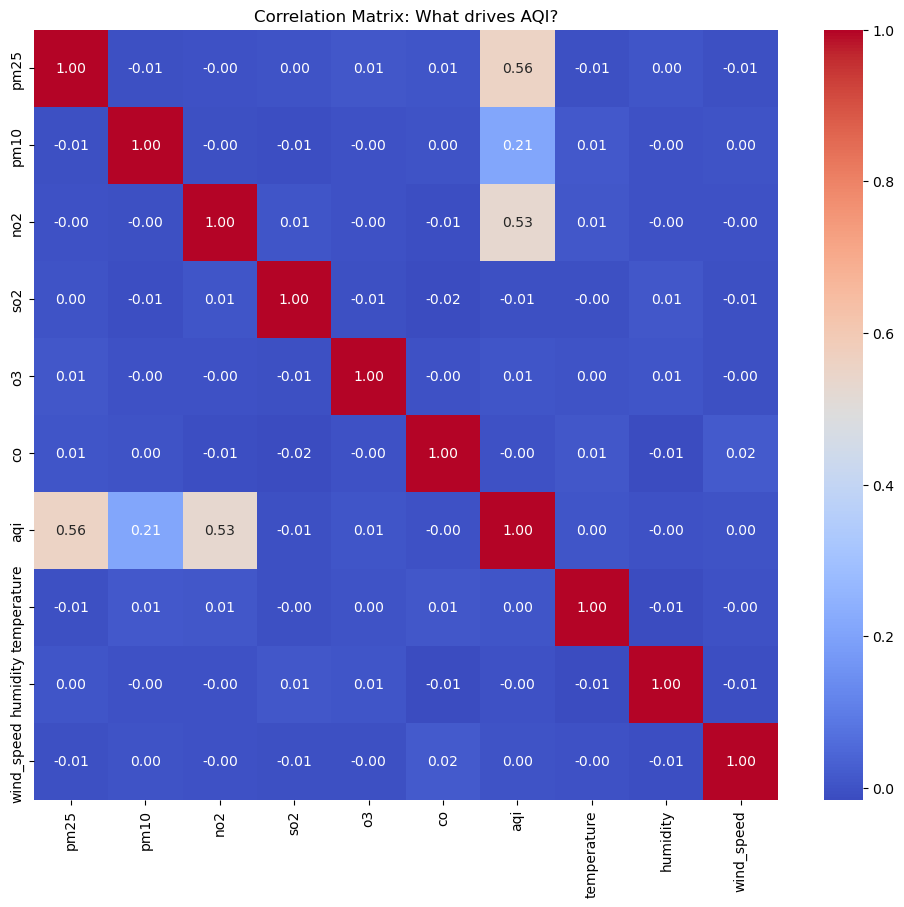

In [9]:
#Plotting A Heatmap between AQI and Other numeric colums
numeric_cols = ['pm25', 'pm10', 'no2', 'so2', 'o3', 'co', 'aqi', 'temperature', 'humidity', 'wind_speed']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: What drives AQI?')
plt.show()

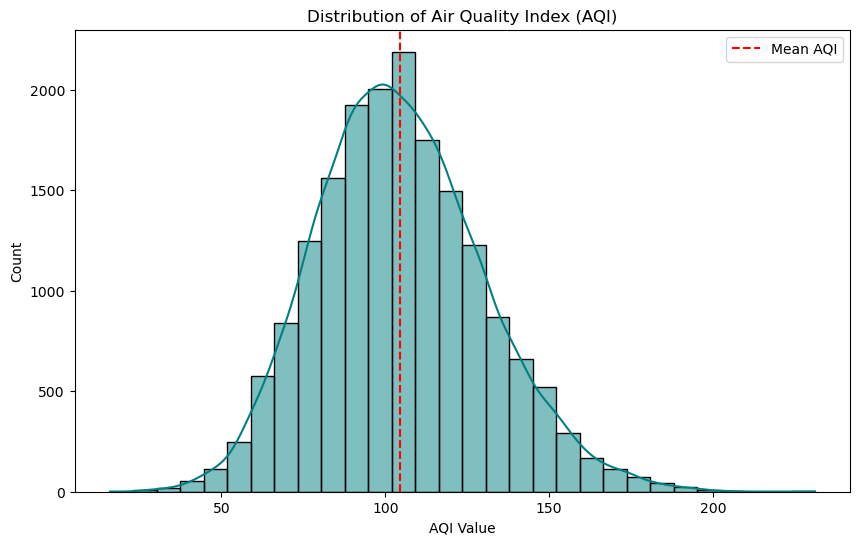

In [10]:
#Plotting A Histogram for AQI column
plt.figure(figsize=(10, 6))
sns.histplot(df['aqi'], kde=True, bins=30, color='teal')
plt.title('Distribution of Air Quality Index (AQI)')
plt.xlabel('AQI Value')
plt.axvline(df['aqi'].mean(), color='red', linestyle='--', label='Mean AQI')
plt.legend()
plt.show()

C:\Users\msi\AppData\Local\Temp\ipykernel_9852\4086251.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='aqi_category', order=cat_order, palette='viridis')


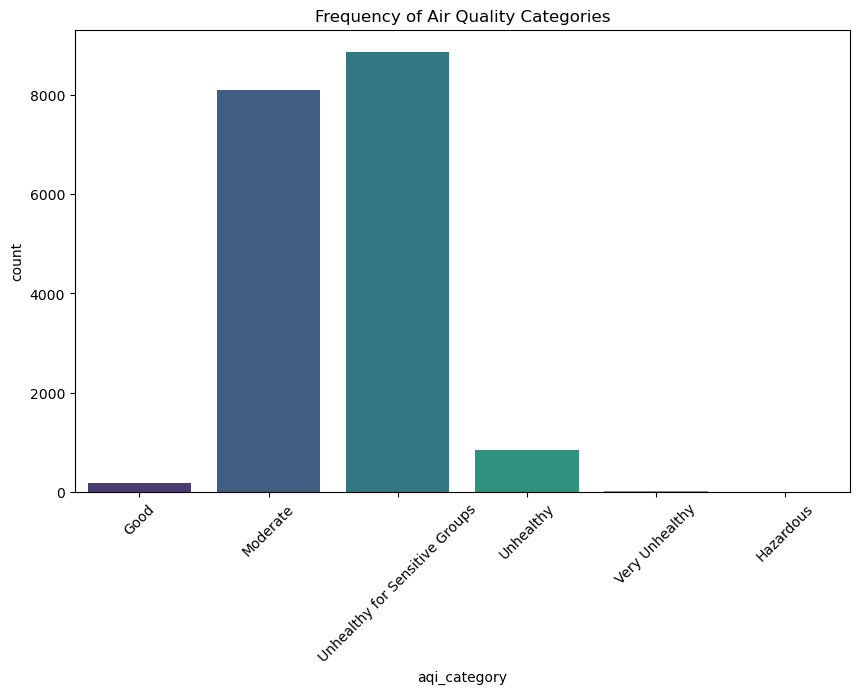

In [11]:
#Plotting a countplot to know How often is the air actually "Bad"
plt.figure(figsize=(10, 6))
cat_order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups',
             'Unhealthy', 'Very Unhealthy', 'Hazardous']

sns.countplot(data=df, x='aqi_category', order=cat_order, palette='viridis')
plt.title('Frequency of Air Quality Categories')
plt.xticks(rotation=45)
plt.show()

C:\Users\msi\AppData\Local\Temp\ipykernel_9852\1903637403.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_pollution, x='aqi', y='city', palette='magma')


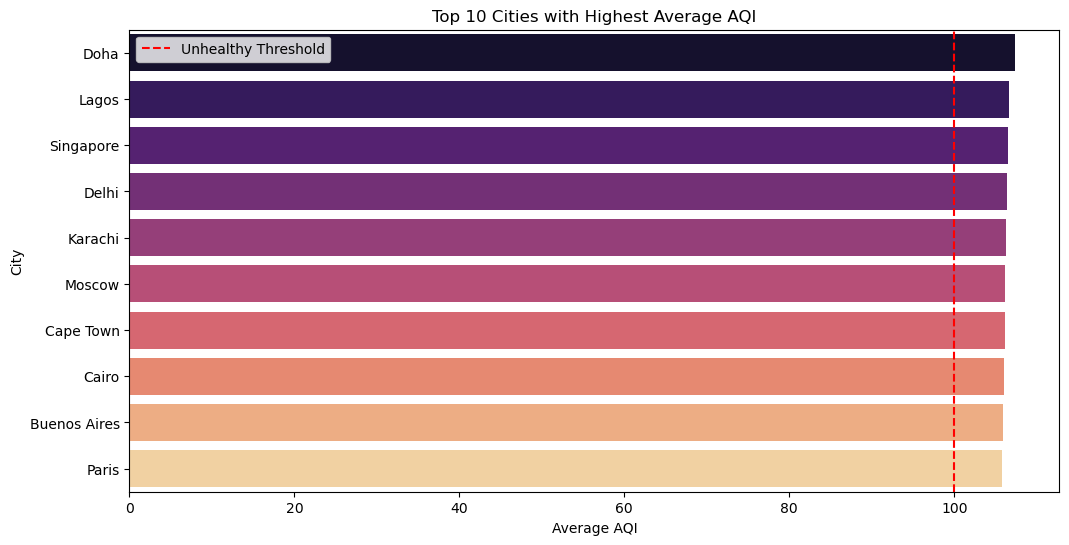

In [12]:
#Finding out which cities are the worst?


city_pollution = df.groupby('city')['aqi'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=city_pollution, x='aqi', y='city', palette='magma')
plt.title('Top 10 Cities with Highest Average AQI')
plt.xlabel('Average AQI')
plt.ylabel('City')
plt.axvline(100, color='red', linestyle='--', label='Unhealthy Threshold')
plt.legend()
plt.show()

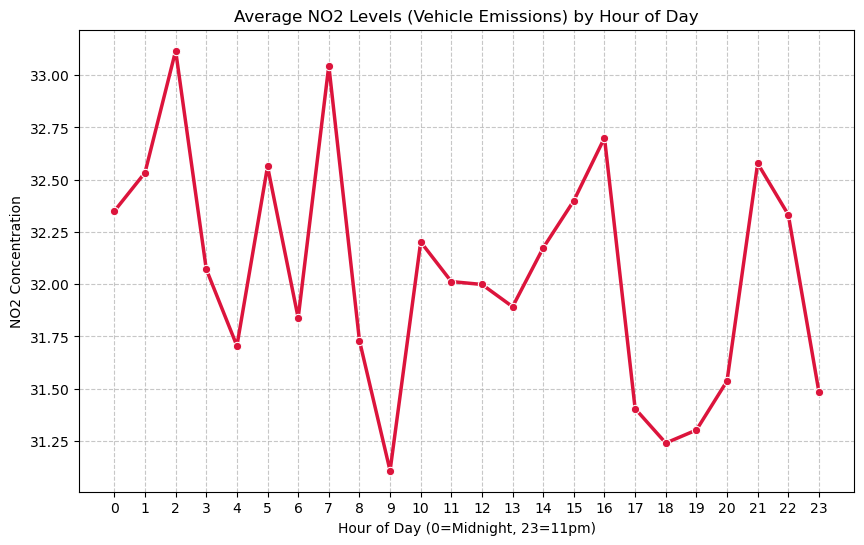

In [13]:
# Finding out does pollution spike during Rush Hour?

hourly_trend = df.groupby('hour')['no2'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_trend, x='hour', y='no2', marker='o', color='crimson', linewidth=2.5)
plt.title('Average NO2 Levels (Vehicle Emissions) by Hour of Day')
plt.xlabel('Hour of Day (0=Midnight, 23=11pm)')
plt.ylabel('NO2 Concentration')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))  # Show all hours
plt.show()

C:\Users\msi\AppData\Local\Temp\ipykernel_9852\1062272416.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_name', y='aqi', order=day_order, palette='Set2')


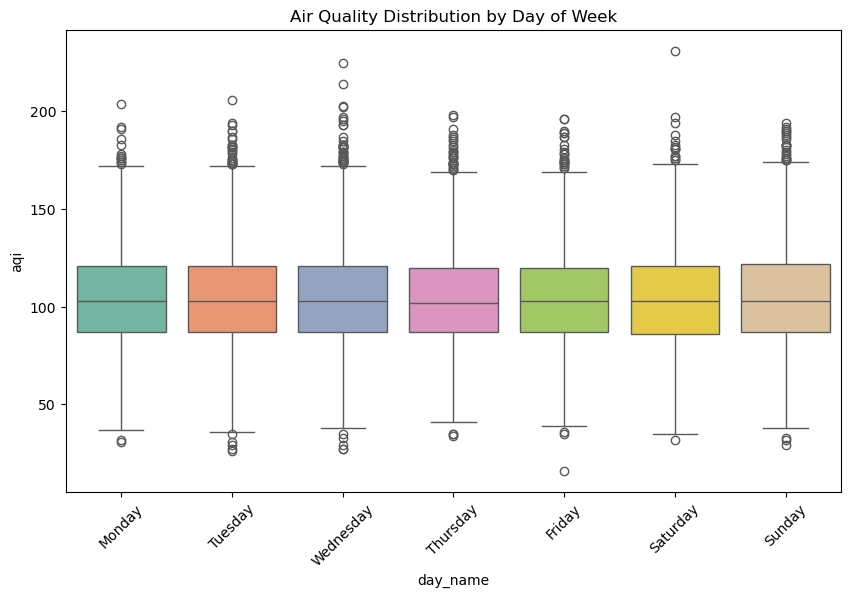

In [14]:
# Finding out whether the weekend cleaner?

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='day_name', y='aqi', order=day_order, palette='Set2')
plt.title('Air Quality Distribution by Day of Week')
plt.xticks(rotation=45)
plt.show()

C:\Users\msi\AppData\Local\Temp\ipykernel_9852\930018711.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=filtered_df, x='day_name', y='aqi', hue='city', order=day_order, ci=None)


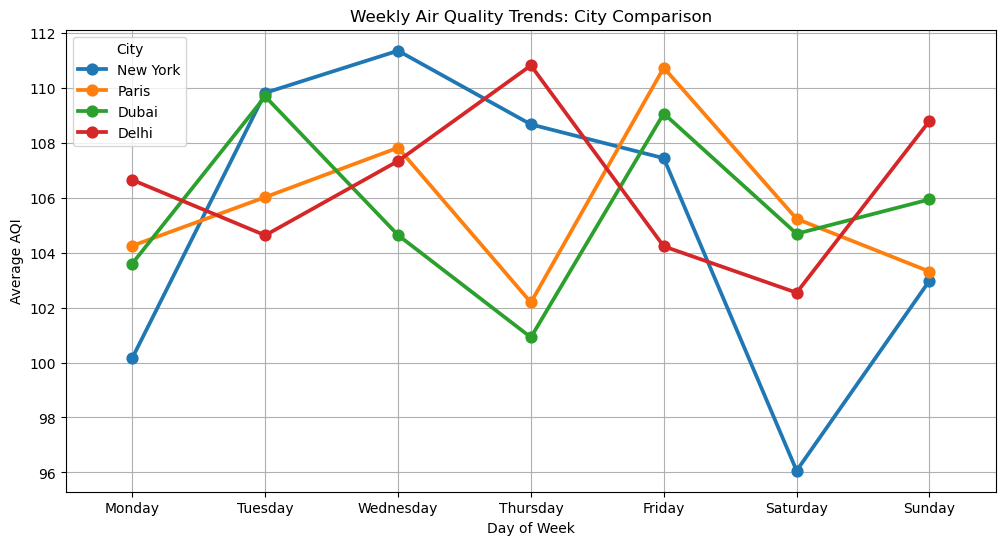

In [15]:
selected_cities = ['New York', 'Delhi', 'Dubai' ,'Paris']
filtered_df = df[df['city'].isin(selected_cities)]

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.pointplot(data=filtered_df, x='day_name', y='aqi', hue='city', order=day_order, ci=None)
plt.title('Weekly Air Quality Trends: City Comparison')
plt.xlabel('Day of Week')
plt.ylabel('Average AQI')
plt.grid(True)
plt.legend(title='City')
plt.show()

C:\Users\msi\AppData\Local\Temp\ipykernel_9852\3884854765.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_risk_cities, x='is_unsafe', y='city', palette='Reds_r')


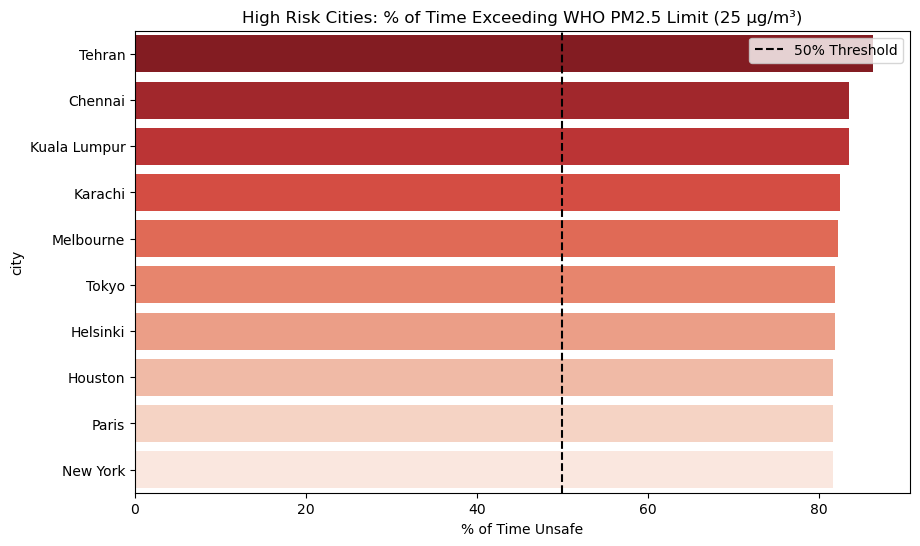

In [16]:
# Calculate % of time each city is "Unsafe" according to WHO Regulations
WHO_LIMIT = 25
df['is_unsafe'] = df['pm25'] > WHO_LIMIT


city_risk = df.groupby('city')['is_unsafe'].mean() * 100
top_risk_cities = city_risk.sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_risk_cities, x='is_unsafe', y='city', palette='Reds_r')
plt.title(f'High Risk Cities: % of Time Exceeding WHO PM2.5 Limit ({WHO_LIMIT} µg/m³)')
plt.xlabel('% of Time Unsafe')
plt.axvline(50, color='black', linestyle='--', label='50% Threshold')
plt.legend()
plt.show()

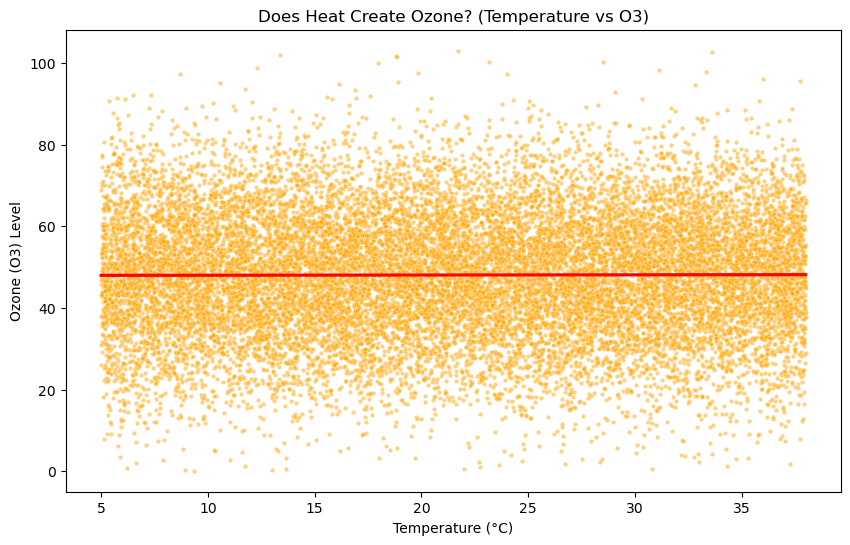

In [17]:
# The "Ozone-Heat" Connection
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature', y='o3', alpha=0.5, color='orange', s=10)
sns.regplot(data=df, x='temperature', y='o3', scatter=False, color='red') # Add trendline
plt.title('Does Heat Create Ozone? (Temperature vs O3)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ozone (O3) Level')
plt.show()

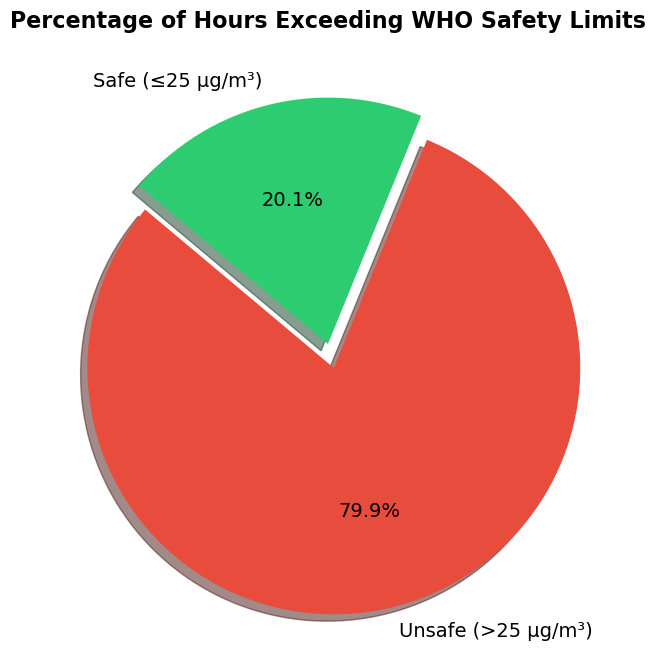

In [4]:
labels = ['Unsafe (>25 µg/m³)', 'Safe (≤25 µg/m³)']
sizes = [79.94, 20.06]
colors = ['#e74c3c', '#2ecc71'] 
explode = (0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})

plt.title('Percentage of Hours Exceeding WHO Safety Limits', fontsize=16, fontweight='bold')

plt.show()

In [18]:
pip install psycopg2-binary pandas sqlalchemy


Note: you may need to restart the kernel to use updated packages.


In [30]:
from sqlalchemy import create_engine
DB_CONFIG = {
    'user': 'postgres',        
    'password': 'password',
    'host': 'localhost',       
    'port': '5432',            
    'dbname': 'air_quality_db' 
}


connection_str = f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['dbname']}"

engine = create_engine(connection_str)
    
    
with engine.connect() as conn:
        print("Connection Successful! Server is running and reachable.")

  
        print("Uploading data to table 'pollution_data'")
    
   
df.to_sql('pollution_data', engine, if_exists='replace', index=False, chunksize=1000)
    
print("Upload Complete! 18,000 rows transferred.")

Connection Successful! Server is running and reachable.
Uploading data to table 'pollution_data'
Upload Complete! 18,000 rows transferred.
